# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     2.996380e+01     6.264364e+00
 * time: 0.005344867706298828
     1     2.707303e+01     4.581090e+00
 * time: 0.015636920928955078
     2     2.364505e+01     8.358460e+00
 * time: 0.0397799015045166
     3     1.326865e+01     2.356007e+00
 * time: 0.0688169002532959
     4     1.177816e+01     1.753826e+00
 * time: 0.08817195892333984
     5     1.172009e+01     1.649274e+00
 * time: 0.1076498031616211
     6     1.083725e+01     1.363627e+00
 * time: 0.12736988067626953
     7     1.015877e+01     1.422892e+00
 * time: 0.14667081832885742
     8     9.869300e+00     1.259577e+00
 * time: 0.16639089584350586
     9     9.724314e+00     7.842416e-01
 * time: 0.18624186515808105
    10     9.618759e+00     6.772529e-01
 * time: 0.20604896545410156
    11     9.523577e+00     6.906267e-01
 * time: 0.22123098373413086
    12     9.414582e+00     5.702924e-01
 * time: 0.23625588417053223
    13     9.354315e+00     4.099276e-01
 * time: 

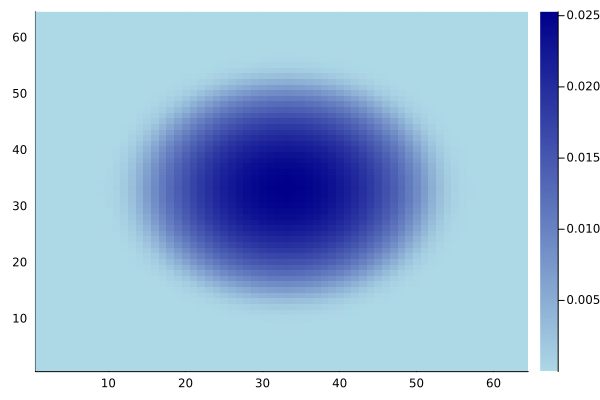

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)